In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-08-04 14:14:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  41.2MB/s    in 4.6s    

2022-08-04 14:14:48 (41.2 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-08-04 14:14:48--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.z

In [ ]:
import zipfile
#unzip 
zip_file = "./rps.zip"
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path="./rps/")

zip_ref.close()




In [ ]:
import zipfile
#unzip 
zip_file = "./rps-test-set.zip"
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall(path="./test_data/")

zip_ref.close()

In [ ]:
import os 
train_dir = os.path.join("./rps/rps")
eval_dir =os.path.join("test_data/rps-test-set")

In [ ]:
rock_train_dir = os.path.join(train_dir,'rock')
paper_train_dir = os.path.join(train_dir,'paper')
scissors_train_dir = os.path.join(train_dir,'scissors')


rock_eval_dir = os.path.join(eval_dir,'rock')
paper_eval_dir = os.path.join(eval_dir,'paper')
scissors_eval_dir = os.path.join(eval_dir,'scessors')

a=os.listdir(rock_train_dir)
print(a[:10])

['rock07-k03-044.png', 'rock04-022.png', 'rock03-051.png', 'rock07-k03-017.png', 'rock02-044.png', 'rock07-k03-078.png', 'rock03-053.png', 'rock03-084.png', 'rock01-029.png', 'rock07-k03-080.png']


In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Model
from tensorflow.keras import layers 

In [ ]:
model = keras.Sequential ([
    layers.Conv2D(64,3,activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3,activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(1024,3,activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 512)       295424    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 512)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 1024)      4719616   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 1024)     0

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
eval_data_gen = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
Train_Data = train_data_gen.flow_from_directory(train_dir,batch_size=20,class_mode='categorical',target_size=(150,150))
Eval_Data = eval_data_gen.flow_from_directory(eval_dir,batch_size=20,class_mode='categorical',target_size=(150,150))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
#model.fit(Train_Data , validation_data = Eval_Data , batch_size = 64 , epochs = 100 )

Epoch 1/100
126/126 [==============================] - 41s 219ms/step - loss: 1.2892 - accuracy: 0.3833 - val_loss: 0.8096 - val_accuracy: 0.5860
Epoch 2/100
126/126 [==============================] - 27s 211ms/step - loss: 0.7554 - accuracy: 0.6643 - val_loss: 0.2603 - val_accuracy: 0.9570
Epoch 3/100
126/126 [==============================] - 28s 219ms/step - loss: 0.4857 - accuracy: 0.8143 - val_loss: 0.2706 - val_accuracy: 0.8737
Epoch 4/100
126/126 [==============================] - 28s 220ms/step - loss: 0.3282 - accuracy: 0.8766 - val_loss: 0.1831 - val_accuracy: 0.9247
Epoch 5/100
126/126 [==============================] - 28s 220ms/step - loss: 0.2349 - accuracy: 0.9159 - val_loss: 0.0944 - val_accuracy: 0.9651
Epoch 6/100
126/126 [==============================] - 28s 219ms/step - loss: 0.2199 - accuracy: 0.9222 - val_loss: 0.1912 - val_accuracy: 0.9220
Epoch 7/100
126/126 [==============================] - 28s 222ms/step - loss: 0.1732 - accuracy: 0.9401 - val_loss: 0.1607 -

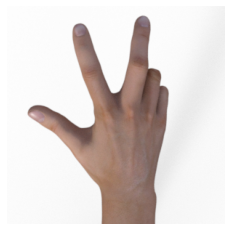

In [ ]:
#plot images 

%matplotlib inline
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg

pic_index = 2 

next_rock = [os.path.join(rock_train_dir,fname)
            for fname in os.listdir(rock_train_dir)[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_train_dir,fname)
            for fname in os.listdir(paper_train_dir)[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_train_dir,fname)
            for fname in os.listdir(scissors_train_dir)[pic_index-2:pic_index]]


for i, img_path in enumerate(next_rock+next_paper+next_scissors) :          #(1,path1),(2,path2)....
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis(False)
  plt.show

In [ ]:
# evaluate from extern data 
import numpy as np 
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()      #import your file 

for fn in uploaded.keys() : 
  path = fn 
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  images = np.expand_dims(x, axis=0)      #from ([1,2]) to ([[1,2]]) #from shape (,2) to (1,2)
  classes = model.predict(images)
  print(fn)
  print(classes)